<a href="https://colab.research.google.com/github/asy047/TensorFlowDeepLearning/blob/master/0725_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 230725 - Day 1


# 패션 MNIST 데이터 받아오고 지도학습 해보기

In [ ]:
from tensorflow import keras

# 지도 학습 (다중 분류)
# x : 입력 데이터 (외부 자극 신호) <-- 패션 아이템 사진
# y : 출력 데이터 (0: 구두, 1: 하이힐, 2: 원피스, ... 9: ) <-- 정답

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# Library (도서관) -> 책(함수, 메서드, 클래스 ...) -> 카테고리화 되어서 정리되어 있음

print(type(x_train)) # numpy.narry인 것을 확인

print(x_train.shape, y_train.shape)   # 딥러닝 모델을 학습하기 위한 데이터셋 (60000장, 28px 28)
print(x_test.shape, y_test.shape)     # 학습된 모델이 제대로 학습되었는지 평가하기 위한 데이터셋 (10000장)

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


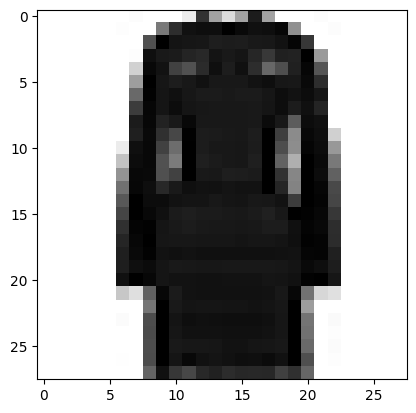

In [ ]:
import matplotlib.pyplot as plt # alias (~라는 가칭/별명으로 부른다)

# cmap -> color map
plt.figure()
plt.imshow(x_train[500], cmap='gray_r') # image show --> imshow # gray_r = gray reverse
plt.show()

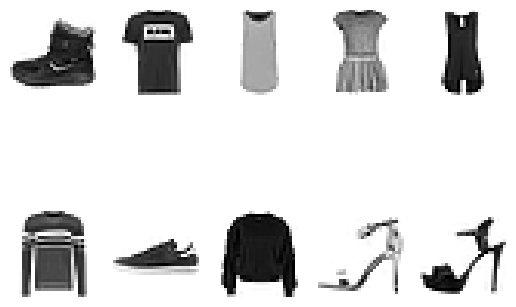

In [ ]:
plt.figure()

for idx in range(10):
  plt.subplot(2, 5, idx + 1) # 여러개를 동시에 그릴 것. 세로 2, 가로 5의 그리드 생성. idx로 인해 하나씩 채워짐
  plt.imshow(x_train[idx], cmap='gray_r') # image show --> imshow # gray_r = gray reverse
  plt.axis('off')

plt.show()

In [ ]:
print(y_train[0:10])    # 0부터 10미만 (0, 1, 2, ..., 9)      # 분류한 정답을 출력 y는 정답이라는 뜻

[9 0 0 3 0 2 7 2 5 5]


In [ ]:
import numpy as np

print(np.unique(y_train, return_counts=True))  # y_train에 저장되어 있는 무수히 많은 데이터들의 단 한 번씩만 출력
# return_counts=True  /  이것들이 어떤 구성으로 이루어져 있는지 확인  /  데이터가 골고루 잘 분포하는지 확인하기 위함
# 0인 데이터 6000개, 1인 데이터 6000개, 2인 데이터 6000개 ...

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


x-train 6만장을 2D 이차원의 사진에서 1D Vector로 변환을 시켜야 함.

이미지를 펼친 배열 -> 1차원 데이터로 이미지를 슬라이싱 해서 쫙 핌.

<br>

28 * 28 을 했을때 pixel 값은 784.

784개를 받을 수 있는 뉴런을 준비.

한 픽셀에 [0 0 0 0 0 0 0 0 0 1] -> 이렇게 나오면 바지=1 이렇게 될 수 있도록!!

# 데이터 전처리(Pre-processing): 정규화

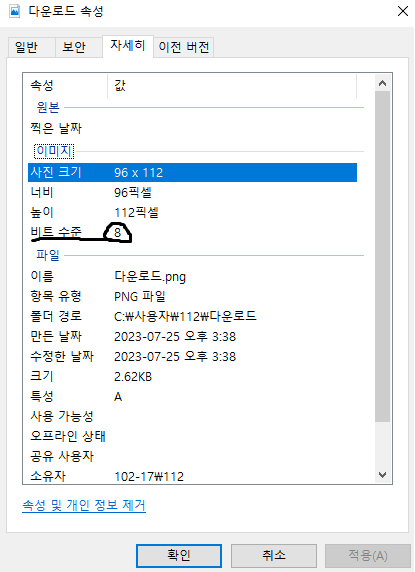

8비트는 전세계적으로 약속한 이미지 규격.

2^8 = 256 가지의 숫자를 포함 가능.

따라서 0 ~ 255까지의 숫자를 넣어서 표현 가능.

픽셀값: 0 (검정색)

픽셀값: 255 (하얀색)

RGB값이 이렇게 이루어지는군!!!! 왜 255인가 궁금했는데 궁금증이 해결되었어요!

비트 수준이 24 -> 총 8 * 3 = 24 (RGB 라는 뜻)

하지만 255는 인식할 수 없어. 0과 1사이에 있는 소수값으로 바꿔야 함.

(예를 들어 144가 R의 값이다 -> 144 / 255) 255로 나누면 0이던 1이던 1 이하의 소수값이 나옴.

이것이 정규화!

In [ ]:
import tensorflow as tf

In [ ]:
x_train_scaled = x_train / 255.0    # 실수 값으로 나눠라
# 정규화

In [ ]:
print(x_train_scaled.shape) # (60000, 28, 28)

In [ ]:
x_train_scaled = x_train_scaled.reshape(60000, 28 * 28)  # Vector로 바꿈. 1차원으로 줄이기
print(x_train_scaled.shape)  # (60000, 784)

(60000, 784)


# 모델 만들기



*   Input Layer
*   은닉층
*   Output Layer

실제로는 모든 x들이 1:多로 하나하나 다 연결되어 있음.

이렇게 연결되어 있는 층은 Dense(밀집한) -> 이 함수를 쓰면 컴퓨터가 밀집된 망을 그려줌


In [ ]:
happycat = keras.layers.Dense(10, activation='softmax',input_shape=(784, )) # 10개의 뉴런으로 구성된 밀집층(Dense) 생성  # activation -> 매개변수가 있는 함수 / softmax -> 확률값을 계산
# 0 또는 1을 출력 - 시그모이드 sigmoid (몰라도 됨)
# input_shape(784) -> 컴퓨터에게 이게 어떻게 생겨 먹었는지 알려줘야 함.

한 픽셀에 [0 0 0 0 0 0 0 0 0 1] -> 이렇게 나오면 바지=1 이렇게 될 수 있도록!!

... 이걸 확률값으로 계산

1이 나올 확률은 [0.01 0.03 0.04 0.02 0 0 0 0.99]

출력값을 확률로 만들어서 맵핑하는 함수 => softmax

In [ ]:
model = keras.Sequential(happycat)
# Sequential(연속된) -> Dense Layer를 연속적으로 쌓아서 Depp learning 모델을 만들겠다.
# Dense변수 happycat

In [ ]:
model.summary()  # 모델의 요약본 (하나의 층으로 연결된 간단한 모델 - happycat)

# Total params: 7,850 (7850개의 파라미터들로 이루어진 모델이라는 뜻)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
# 지도 학습 (다중 분류)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')
# loss = 'sparse_categorical_crossentropy' -> loss 손실, 오류(에러)를 줄이다. data loss
#      문제(x) + 정답(y)
#      y_predict -> 모델이 학습한 결과를 바탕으로 예측한 값
#      정답(y) - y_prediction(예측) = loss(오차, error)
#      정답과 예측한 값을 빼는 값 = 오차, 오류, error
#      이 오차를 단순히 더해버리면 양수 + 음수 = 0가 됨. 따라서 절대값을 씌우거나 제곱을 시켜서 오차값 관리를 해야함
#      그것이 loss = 'sparse_categoricla_crossentropy' -> 로그함수

# optimizer = 'adam'
#      6만장을 한 번에 다 던져주면 애가 토하고... 난리남.
#      그래서 처음에 10장 -> 20장 -> 30장 으로 늘려서 천천히 학습 시키기

In [ ]:
# 모델 학습
# fit <- 딱 들어맞는

model.fit(x_train_scaled, y_train, epochs=5) # 문제집을 5번 반복해서 풀 것이다!!

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.6001 - accuracy: 0.7972
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4619 - accuracy: 0.8420
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4353 - accuracy: 0.8505
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4231 - accuracy: 0.8540
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4127 - accuracy: 0.8583


loss -> 작으면 작을수록 좋은 오차 범위

점점 줄어드는 것을 볼 수 있다.

accuracy -> 정확도. 높으면 높을 수록 좋다.

점점 커지는 것을 볼 수 있다.

In [ ]:
# 평가
x_test_scaled = x_test / 255.0  # 모델에 학습시키는 데이터를 정규화를 해놨기 때문에 test 데이터도 정규화를 시켜줘야 함
x_test_scaled = x_test_scaled.reshape(10000, 784)  # 이미지니까 1차원 Vector로 또 만들어줘야 함  # 2D -> 1D 모양 변경

In [ ]:
testoutput = model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8443


In [ ]:
print(type(testoutput))
print(testoutput)  # loss와 accyracy의 값이 반환됨을 확인

print('테스트 데이터의 손실:', testoutput[0])
print('테스트 데이터의 정확도: %.3f' % (testoutput[1] * 100))

<class 'list'>
[0.44655704498291016, 0.8442999720573425]
테스트 데이터의 손실: 0.44655704498291016
테스트 데이터의 정확도: 84.430
